In [259]:
import pandas as pd # Для работы с данными
import matplotlib.pyplot as plt  # Библиотека для визуализации результатов 
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline # используем пайплайны для удобства
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

<p style="align: center;"><img align=center src="https://netology.ru/backend/tilda/images/tild3439-3364-4535-b334-656263633534__main.svg"  width=900></p>
<h3 style="text-align: center;"><b>Классификация. Логистическая регрессия и SVM</b></h3>

#  Домашнее задание

### Задание  
    * В домашнем задании нужно решить задачу классификации физических лиц по уровню дохода. 
    * Данные для обучения модели хранятся в файле adult.csv, который можно найти в материалах к занятию или скачать с сайта. 
    * Целевая переменная – уровень дохода income, который принимает два значения <=50K и >50K, поэтому классификация бинарная. 
    * Остальные признаки описывают персональную информацию – возраст, образование, семейное положение и т. д. 
    * Подробное описание признаков и их возможные значения можно получить самостоятельно, используя функции Python3 для анализа датасета (describe, unique и т.д) или прочитать информацию по ссылке. 
    * Задачу классификации нужно решить при помощи обучения модели логистической регрессии и модели опорных векторов.

<p>Загружаем датасет.</p>

In [260]:
df = pd.read_csv( 'adult.csv', na_values='?')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


<p>Проведём первичный анализ.</p>

In [261]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        46043 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       46033 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   47985 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [262]:
df["income"].value_counts().head()

<=50K    37155
>50K     11687
Name: income, dtype: int64

Отсутствуют данные в столбцах:

* workclass
* occupation
* native-country

Удаляем эти данные

In [263]:
df = df.dropna()

Альтернативный способ, заполнить данные мо́дой (значение во множестве наблюдений, которое встречается наиболее часто).

In [264]:
# df['workclass'].fillna(df['workclass'].mode()[0], inplace=True)
# df['occupation'].fillna(df['occupation'].mode()[0], inplace=True)
# df['native-country'].fillna(df['native-country'].mode()[0], inplace=True)

Визуализируем распределение значений возраста для лиц, зарабатывающих "> 50K" и "<= 50K"

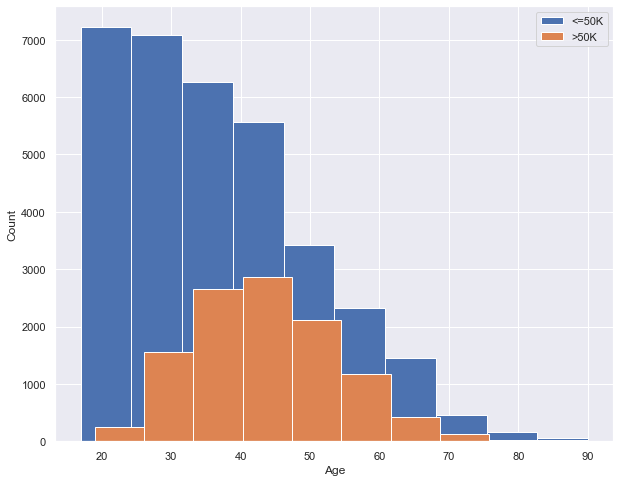

In [265]:
plt.figure(figsize=(10,8))
df.groupby('income')['age'].hist()
plt.ylabel('Count')
plt.xlabel('Age')
plt.legend(np.array(["<=50K", ">50K"]))
plt.show()


<AxesSubplot:xlabel='count', ylabel='education'>

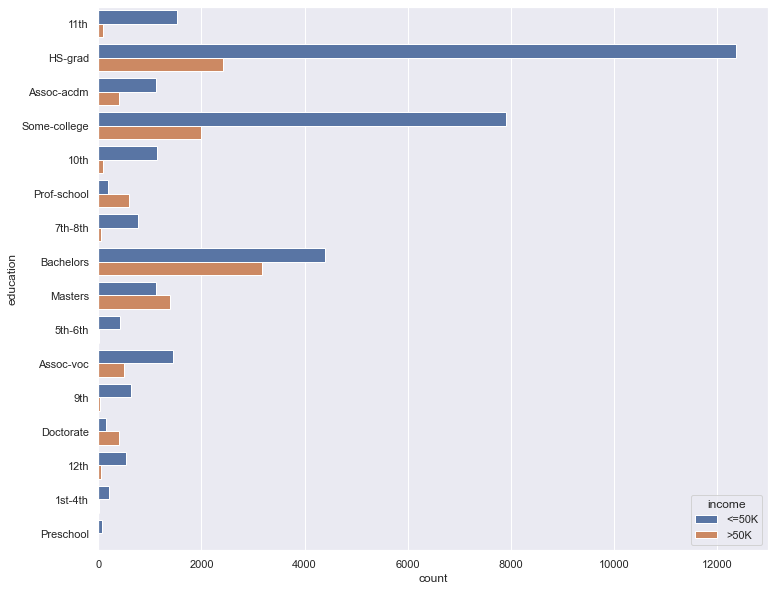

In [266]:
sns.set(rc={'figure.figsize':(12,10)})
sns.countplot(y='education', hue="income", data=df)

Исходя их графика выше, видно что люди, зарабатывающие > 50K имеют как минимум полное среднее образование.

Преобразуем категориальные признаки:

In [267]:
df['gender'].replace(['Female','Male'],[0,1], inplace=True)

Выберем категориальные признаки для использования в обучении 

In [268]:
selectedColumns = df[['age', 'workclass', 'education', 'marital-status', 'occupation', 
                      'relationship', 'race', 'gender', 'hours-per-week']]

Переведем категориальные столбцы в значения 0 и 1, добавив столбцы с соответствующими названиями

In [269]:
X = pd.get_dummies (selectedColumns, columns = 
                    ['workclass', 'education', 'marital-status', 'occupation',
                     'relationship', 'race'])
X.head()

,age,gender,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,...,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White
0,25,1,40,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1,38,1,50,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,28,1,40,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,44,1,40,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,34,1,30,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [270]:
# Обработка целевого значения
le = LabelEncoder()
le.fit(df['income'] )

LabelEncoder()

In [271]:
y = pd.Series (data = le.transform(df['income']))
y.head()

0    0
1    0
2    1
3    1
4    0
dtype: int32

### Логистическая регрессия

In [278]:
# разделяем наши данные на тренировочные для обучения(80%) и тестовые для проверки (20%) random_state закрепляет разделение, 
# чтобы не менялись случайным образом
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [279]:
model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))

In [280]:
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [281]:
# Ошибка обучения
model.score(X_train, y_train) 

0.8310252370290516

In [282]:
# Ошибка обобщения
model.score(X_test,y_test)

0.8325041459369817

In [283]:
predict_logreg = pd.DataFrame([model.predict(X_test), y_test]).T
predict_logreg.columns = ['predict', 'test']
predict_logreg

,predict,test
0,0,0
1,0,0
2,0,1
3,0,0
4,0,0
...,...,...
9040,0,0
9041,0,0
9042,0,0
9043,0,0


### Метод опорных векторов. SVM.

In [284]:
# используем пайплайны
clf = make_pipeline(StandardScaler(), SVC(gamma='auto')) 
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [285]:
# Ошибка обучения
clf.score(X_train, y_train) 

0.8363601183072118

In [286]:
# Ошибка обобщения
clf.score(X_test, y_test)

0.8357103372028745

In [287]:
predict_svm = pd.DataFrame([clf.predict(X_test), y_test]).T
predict_svm.columns = ['predict', 'test']
predict_svm

,predict,test
0,0,0
1,0,0
2,0,1
3,0,0
4,0,0
...,...,...
9040,0,0
9041,0,0
9042,0,0
9043,0,0


#### Вывод:
При практически одинаковом качестве, SVM модель обучается намного дольше.
Обе модели хорошо обучились, это видно по ошибкам обучения и обощения.

Для улучшения результата:
1. заполнение пропусков модами
2. нормализация данных
3. настройка гиперпараметров
4. использовать другой классификатор